In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/forecasting_dataset(2013-2030).csv', encoding='utf-8')

In [4]:
df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),총인구수증감,총인구수증감률,유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,순이동,학령인구(명),학령인구증감률,지가 변동률,행정구역
0,강원특별자치도,강릉시,2013,216806.0,-935.0,-0.429409,40.0,35.0,1460.0,1471.0,1026.0,528.0,-942.0,40758.0,-1.998125,1.514,강원특별자치도 강릉시
1,강원특별자치도,강릉시,2014,215807.0,-999.0,-0.460781,41.0,35.0,1298.0,1539.0,983.0,473.0,-810.0,39345.0,-3.466804,1.739,강원특별자치도 강릉시
2,강원특별자치도,강릉시,2015,214560.0,-1247.0,-0.577831,44.0,35.0,1402.0,1553.0,977.0,481.0,-1185.0,37605.0,-4.422417,2.787,강원특별자치도 강릉시
3,강원특별자치도,강릉시,2016,213846.0,-714.0,-0.332774,38.0,35.0,1236.0,1545.0,920.0,465.0,-497.0,36113.0,-3.967558,2.626,강원특별자치도 강릉시
4,강원특별자치도,강릉시,2017,213952.0,106.0,0.049568,38.0,35.0,1084.0,1529.0,924.0,444.0,540.0,34780.0,-3.691192,4.070,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,충청북도,충주시,2026,210136.0,218.0,0.109523,44.0,35.0,723.0,1696.0,823.0,489.0,423.0,30569.0,-3.303216,2.000,충청북도 충주시
4028,충청북도,충주시,2027,209912.0,218.0,0.109523,44.0,35.0,670.0,1696.0,823.0,490.0,423.0,30563.0,-3.303203,2.000,충청북도 충주시
4029,충청북도,충주시,2028,210123.0,218.0,0.109523,44.0,35.0,617.0,1696.0,823.0,490.0,423.0,30569.0,-3.303205,2.000,충청북도 충주시
4030,충청북도,충주시,2029,209924.0,218.0,0.109523,44.0,35.0,564.0,1696.0,823.0,490.0,423.0,30563.0,-3.303204,2.000,충청북도 충주시


In [5]:
data = df

In [6]:
use_cols = ['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '순이동', '학령인구(명)']

In [7]:
df['행정구역'].value_counts()

행정구역
강원특별자치도 강릉시    18
강원특별자치도 고성군    18
서울특별시 은평구      18
서울특별시 종로구      18
서울특별시 중구       18
               ..
경상북도 영양군       18
경상북도 영주시       18
경상북도 영천시       18
경상북도 예천군       18
충청북도 충주시       18
Name: count, Length: 224, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

In [9]:
# 연도가 2013부터 2020까지인 데이터 추출
filtered_df = df[(df['연도'] >= 2013) & (df['연도'] <= 2020)]

# 결과 출력
print(filtered_df)

     행정구역(시도) 행정구역(시군구)    연도   총인구수(명)  총인구수증감   총인구수증감률     유치원 수    초등학교 수  \
0     강원특별자치도       강릉시  2013  0.160079  -935.0 -0.429409  0.193878  0.246032   
1     강원특별자치도       강릉시  2014  0.159309  -999.0 -0.460781  0.198980  0.246032   
2     강원특별자치도       강릉시  2015  0.158348 -1247.0 -0.577831  0.214286  0.246032   
3     강원특별자치도       강릉시  2016  0.157798  -714.0 -0.332774  0.183673  0.246032   
4     강원특별자치도       강릉시  2017  0.157880   106.0  0.049568  0.183673  0.246032   
...       ...       ...   ...       ...     ...       ...       ...       ...   
4017     충청북도       충주시  2016  0.153563   437.0  0.210184  0.219388  0.269841   
4018     충청북도       충주시  2017  0.153537   -34.0 -0.016319  0.219388  0.269841   
4019     충청북도       충주시  2018  0.155223  2188.0  1.050327  0.224490  0.269841   
4020     충청북도       충주시  2019  0.155402   233.0  0.110687  0.214286  0.261905   
4021     충청북도       충주시  2020  0.154978  -551.0 -0.261463  0.214286  0.253968   

          출생건수      사망건수   

In [17]:
filtered_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),총인구수증감,총인구수증감률,유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,순이동,학령인구(명),학령인구증감률,지가 변동률,행정구역
0,강원특별자치도,강릉시,2013,0.160079,-935.0,-0.429409,0.193878,0.246032,0.181171,0.217673,0.195791,0.204664,0.266005,0.170175,-1.998125,1.514,강원특별자치도 강릉시
1,강원특별자치도,강릉시,2014,0.159309,-999.0,-0.460781,0.198980,0.246032,0.168628,0.228179,0.190899,0.182549,0.267380,0.164248,-3.466804,1.739,강원특별자치도 강릉시
2,강원특별자치도,강릉시,2015,0.158348,-1247.0,-0.577831,0.214286,0.246032,0.176680,0.230341,0.190216,0.185766,0.263475,0.156949,-4.422417,2.787,강원특별자치도 강릉시
3,강원특별자치도,강릉시,2016,0.157798,-714.0,-0.332774,0.183673,0.246032,0.163828,0.229106,0.183732,0.179333,0.270638,0.150691,-3.967558,2.626,강원특별자치도 강릉시
4,강원특별자치도,강릉시,2017,0.157880,106.0,0.049568,0.183673,0.246032,0.152059,0.226634,0.184187,0.170889,0.281435,0.145100,-3.691192,4.070,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,충청북도,충주시,2016,0.153563,437.0,0.210184,0.219388,0.269841,0.178693,0.238220,0.185324,0.190591,0.280915,0.145704,-3.088492,1.521,충청북도 충주시
4018,충청북도,충주시,2017,0.153537,-34.0,-0.016319,0.219388,0.269841,0.163673,0.247799,0.187600,0.184158,0.279655,0.140369,-3.642194,3.133,충청북도 충주시
4019,충청북도,충주시,2018,0.155223,2188.0,1.050327,0.224490,0.269841,0.157557,0.249189,0.193174,0.192199,0.303830,0.137005,-2.383216,2.704,충청북도 충주시
4020,충청북도,충주시,2019,0.155402,233.0,0.110687,0.214286,0.261905,0.153298,0.249034,0.178043,0.189385,0.283913,0.132282,-3.427702,1.888,충청북도 충주시


In [10]:
# 시퀀스 데이터 생성
def create_sequence_data(data, sequence_length):
    sequences = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length):
            seq = temp_df[i:i+sequence_length+1]
            sequences.append(seq)
    return np.array(sequences)

In [11]:
sequence_length = 3  # 시퀀스 길이
sequences = create_sequence_data(filtered_df, sequence_length)

In [12]:
sequences.shape

(1120, 4, 9)

In [13]:
# 데이터셋 분리
X = sequences[:, :-1]
y = sequences[:, -1][:, -1]

In [20]:
# 훈련/검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [22]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
# 모델 학습
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
28/28 [==============================] - 1s 1ms/step - loss: 0.0165
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 9.8741e-04
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 8.4312e-04
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 7.2244e-04
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 6.2101e-04
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 5.2813e-04
Epoch 11/100
28/28 [==============================] - 0s 1ms/step - loss: 4.5942e-04
Epoch 12/100
28/28 [==============================] - 0s 1ms/step - loss: 3.5107e-04
Epoch 13/

In [24]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

7/7 [==============================] - 0s 1ms/step


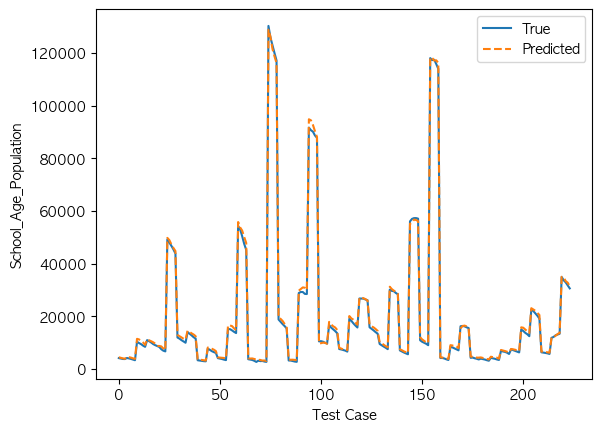

Mean Squared Error: 840679.62
Mean Absolute Percentage Error (MAPE): 7.25%


In [28]:
# 예측
predicted_data = model.predict(X_test)

# 예측 결과 역전환
#predicted_data = scaler.inverse_transform(predicted_data)
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
predicted_data = predicted_data.round()
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_true = invTransform(scaler, y_test, '학령인구(명)', use_cols).reshape(-1, 1)

# 결과 시각화
plt.plot(range(len(y_true)), y_true, label='True')
plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
plt.xlabel('Test Case')
plt.ylabel('School_Age_Population')
plt.legend()
plt.show()

# 모델 평가
mse = mean_squared_error(y_true, predicted_data)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE 계산
mape = calculate_mape(y_true, predicted_data)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

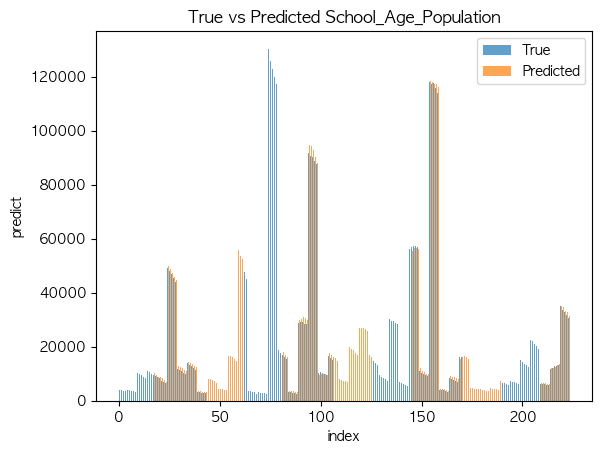

In [29]:
# 결과 시각화 (barplot)
bar_width = 0.35
index = np.arange(len(y_true))

plt.bar(index, y_true.flatten(), bar_width, label='True', alpha=0.7)
plt.bar(index + bar_width, predicted_data.flatten(), bar_width, label='Predicted', alpha=0.7, linestyle='--')

plt.xlabel('index')
plt.ylabel('predict')
plt.title('True vs Predicted School_Age_Population')
plt.legend()
plt.show()

In [30]:
for yt, pr in zip(y_true, predicted_data):
    print(yt, pr)

[4079.] [4387.]
[3907.] [4165.]
[3742.] [3976.]
[3719.] [3831.]
[4107.] [4598.]
[3962.] [4418.]
[3761.] [4254.]
[3514.] [3980.]
[3271.] [3809.]
[10277.] [11401.]
[9790.] [11165.]
[9377.] [10679.]
[8807.] [9998.]
[8355.] [9094.]
[10920.] [11213.]
[10502.] [10822.]
[9989.] [10485.]
[9401.] [10085.]
[8984.] [9566.]
[8640.] [8683.]
[8328.] [8688.]
[7451.] [8520.]
[6896.] [7732.]
[6630.] [7085.]
[49204.] [49753.]
[47957.] [48895.]
[46724.] [47288.]
[45374.] [45926.]
[43824.] [44751.]
[11900.] [12891.]
[11467.] [12424.]
[10893.] [11931.]
[10413.] [11422.]
[9916.] [11128.]
[13938.] [14508.]
[13331.] [14044.]
[12711.] [13478.]
[12007.] [13031.]
[11498.] [12401.]
[3256.] [3623.]
[3127.] [3493.]
[3035.] [3334.]
[2913.] [3266.]
[2858.] [3142.]
[7675.] [8101.]
[7226.] [7931.]
[6719.] [7632.]
[6342.] [7263.]
[6025.] [6744.]
[4058.] [4338.]
[3896.] [4271.]
[3728.] [4177.]
[3496.] [4124.]
[3312.] [3877.]
[15109.] [16531.]
[15067.] [16472.]
[14603.] [16222.]
[14046.] [15368.]
[13591.] [14667.]
[54278.

In [33]:
prediction_df = df[df['연도'].isin([i for i in range(2018, 2030)])]

In [34]:
prediction_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),총인구수증감,총인구수증감률,유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,순이동,학령인구(명),학령인구증감률,지가 변동률,행정구역
5,강원특별자치도,강릉시,2018,0.157113,-995.0,-0.465058,0.183673,0.246032,0.148343,0.249652,0.178726,0.166466,0.271732,0.139941,-3.536515,3.292,강원특별자치도 강릉시
6,강원특별자치도,강릉시,2019,0.157487,485.0,0.227746,0.173469,0.238095,0.142769,0.256141,0.180660,0.190993,0.288234,0.135591,-3.090909,2.857,강원특별자치도 강릉시
7,강원특별자치도,강릉시,2020,0.157393,-121.0,-0.056690,0.178571,0.246032,0.141685,0.254442,0.170193,0.159228,0.282185,0.128771,-5.001076,2.885,강원특별자치도 강릉시
8,강원특별자치도,강릉시,2021,0.157393,121.0,0.055721,0.178571,0.246032,0.137736,0.254442,0.173834,0.182549,0.285652,0.129614,-4.600945,3.000,강원특별자치도 강릉시
9,강원특별자치도,강릉시,2022,0.157393,-1.0,-0.000619,0.178571,0.246032,0.133788,0.254442,0.170193,0.166868,0.283726,0.128771,-4.428446,3.000,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,충청북도,충주시,2025,0.154756,218.0,0.109523,0.214286,0.246032,0.128213,0.252433,0.172696,0.189787,0.280207,0.127412,-3.303142,2.000,충청북도 충주시
4027,충청북도,충주시,2026,0.154939,218.0,0.109523,0.214286,0.246032,0.124110,0.252433,0.172696,0.188983,0.280217,0.127437,-3.303216,2.000,충청북도 충주시
4028,충청북도,충주시,2027,0.154766,218.0,0.109523,0.214286,0.246032,0.120006,0.252433,0.172696,0.189385,0.280217,0.127412,-3.303203,2.000,충청북도 충주시
4029,충청북도,충주시,2028,0.154929,218.0,0.109523,0.214286,0.246032,0.115903,0.252433,0.172696,0.189385,0.280217,0.127437,-3.303205,2.000,충청북도 충주시


In [50]:
# 시퀀스 데이터 생성
def create_sequence_data1(data, sequence_length):
    sequences = []
    regions = []
    year = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        year.extend([i for i in range(2021, 2031)])
        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length+1):
            regions.append(region)
            seq = temp_df[i:i+sequence_length]
            sequences.append(seq)
    return np.array(sequences), np.array(regions), np.array(year)

In [51]:
X_sequences, r, y = create_sequence_data1(prediction_df, sequence_length)

In [52]:
X_sequences

array([[[0.15711298, 0.18367347, 0.24603175, ..., 0.16646562,
         0.27173155, 0.13994077],
        [0.15748672, 0.17346939, 0.23809524, ..., 0.19099316,
         0.28823389, 0.13559109],
        [0.15739348, 0.17857143, 0.24603175, ..., 0.15922799,
         0.28218476, 0.12877085]],

       [[0.15748672, 0.17346939, 0.23809524, ..., 0.19099316,
         0.28823389, 0.13559109],
        [0.15739348, 0.17857143, 0.24603175, ..., 0.15922799,
         0.28218476, 0.12877085],
        [0.15739348, 0.17857143, 0.24603175, ..., 0.18254926,
         0.28565182, 0.12961394]],

       [[0.15739348, 0.17857143, 0.24603175, ..., 0.15922799,
         0.28218476, 0.12877085],
        [0.15739348, 0.17857143, 0.24603175, ..., 0.18254926,
         0.28565182, 0.12961394],
        [0.15739348, 0.17857143, 0.24603175, ..., 0.16686771,
         0.28372568, 0.12877085]],

       ...,

       [[0.1547557 , 0.21428571, 0.24603175, ..., 0.18978689,
         0.28020657, 0.12741183],
        [0.15493911, 

In [53]:
r

array(['강원특별자치도 강릉시', '강원특별자치도 강릉시', '강원특별자치도 강릉시', ..., '충청북도 충주시',
       '충청북도 충주시', '충청북도 충주시'], dtype='<U15')

In [54]:
X_sequences[1]

array([[0.15748672, 0.17346939, 0.23809524, 0.14276866, 0.25614089,
        0.18065984, 0.19099316, 0.28823389, 0.13559109],
       [0.15739348, 0.17857143, 0.24603175, 0.14168473, 0.25444153,
        0.1701934 , 0.15922799, 0.28218476, 0.12877085],
       [0.15739348, 0.17857143, 0.24603175, 0.13773614, 0.25444153,
        0.1738339 , 0.18254926, 0.28565182, 0.12961394]])

In [57]:
# 예측
predicted_data = model.predict(X_sequences)

70/70 [==============================] - 0s 797us/step


In [58]:
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)

In [59]:
predicted_data.round()

array([[30480.],
       [29955.],
       [29629.],
       ...,
       [28838.],
       [28736.],
       [28618.]])

In [60]:
predicted_df = pd.DataFrame({'연도': y, '행정구역': r, '학령인구(명)': predicted_data.round().flatten()})

In [61]:
predicted_df

,연도,행정구역,학령인구(명)
0,2021,강원특별자치도 강릉시,30480.0
1,2022,강원특별자치도 강릉시,29955.0
2,2023,강원특별자치도 강릉시,29629.0
3,2024,강원특별자치도 강릉시,29485.0
4,2025,강원특별자치도 강릉시,29407.0
...,...,...,...
2235,2026,충청북도 충주시,29059.0
2236,2027,충청북도 충주시,28959.0
2237,2028,충청북도 충주시,28838.0
2238,2029,충청북도 충주시,28736.0


In [62]:
predicted_df.to_csv('./data/predicted_school_age_population(2021-2030).csv', encoding='utf-8', index=False)